# Intensity profile

In this notebook we evaluate the spatial beam profile from a camera capture.

In [28]:
from PIL import Image

datadir = '../../dataset/camera'
figuredir = '../../figure/intensity/profile'

os.makedirs(figuredir, exist_ok=True)

# pixel size from datasheet in micrometer
ps = 5.86

def read(filepath):
    return np.array(Image.open(filepath))

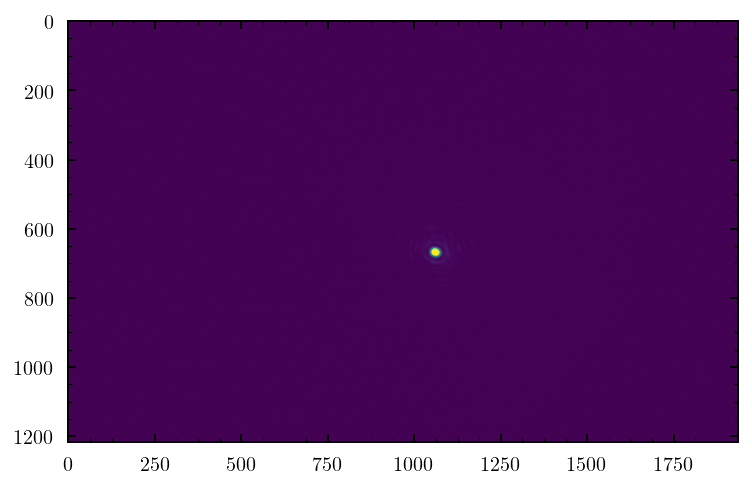

In [19]:
image = read(os.path.join(datadir, 'dot.tif'))

plt.imshow(image)
plt.show()

In [56]:
i, j = np.argwhere(image == image.max()).mean(axis=0).round().astype(int)

l = 50

patch = image[i-l:i+l, j-l:j+l] / image.max()
h, w = patch.shape

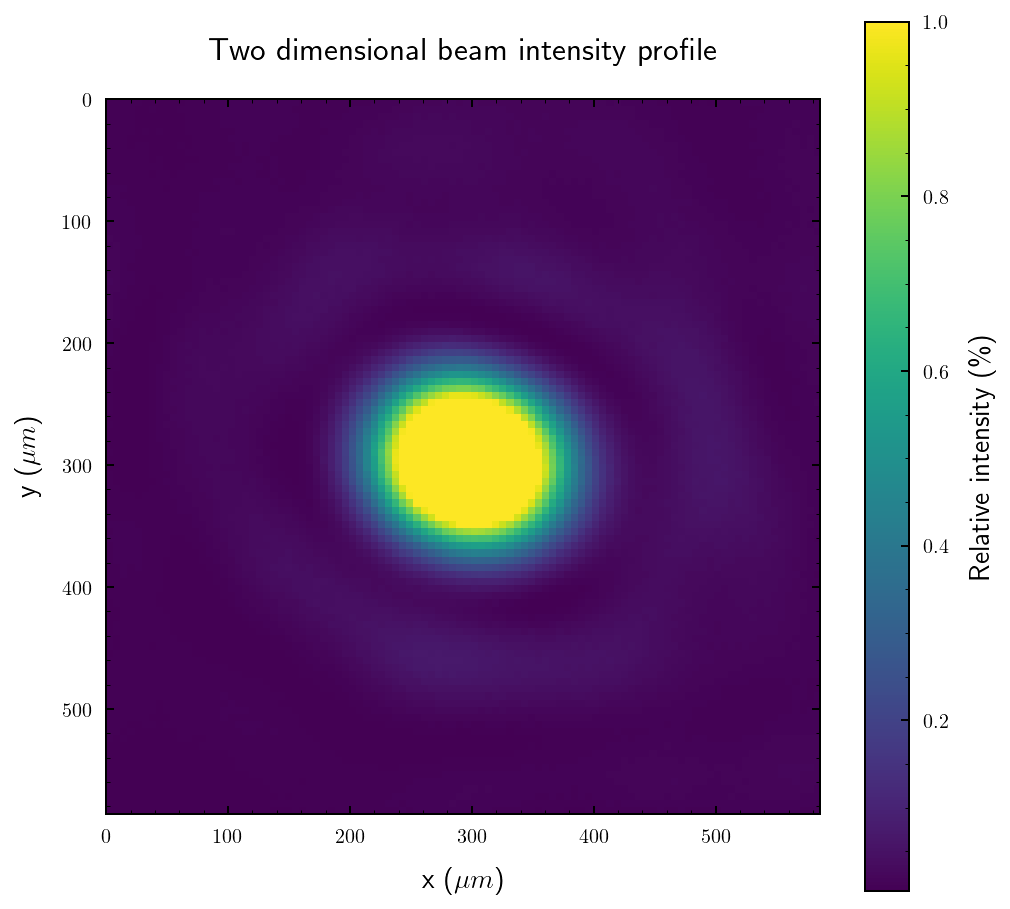

In [52]:
fig = plt.figure(figsize=(8, 8))

plt.imshow(patch, interpolation='none', extent=[0, w*ps, h*ps, 0])
plt.xlabel('x ($\mu m$)')
plt.ylabel('y ($\mu m$)')
plt.title('Two dimensional beam intensity profile')
plt.colorbar(label='Relative intensity (\%)')

fig.savefig(os.path.join(figuredir, 'profile2d.pdf'))

plt.show()

In [63]:
from scipy import optimize

def gaussian(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def fit(func, x, y, p0):
    p, _ = optimize.curve_fit(func, x, y, p0)
    
    return func(x, *p)

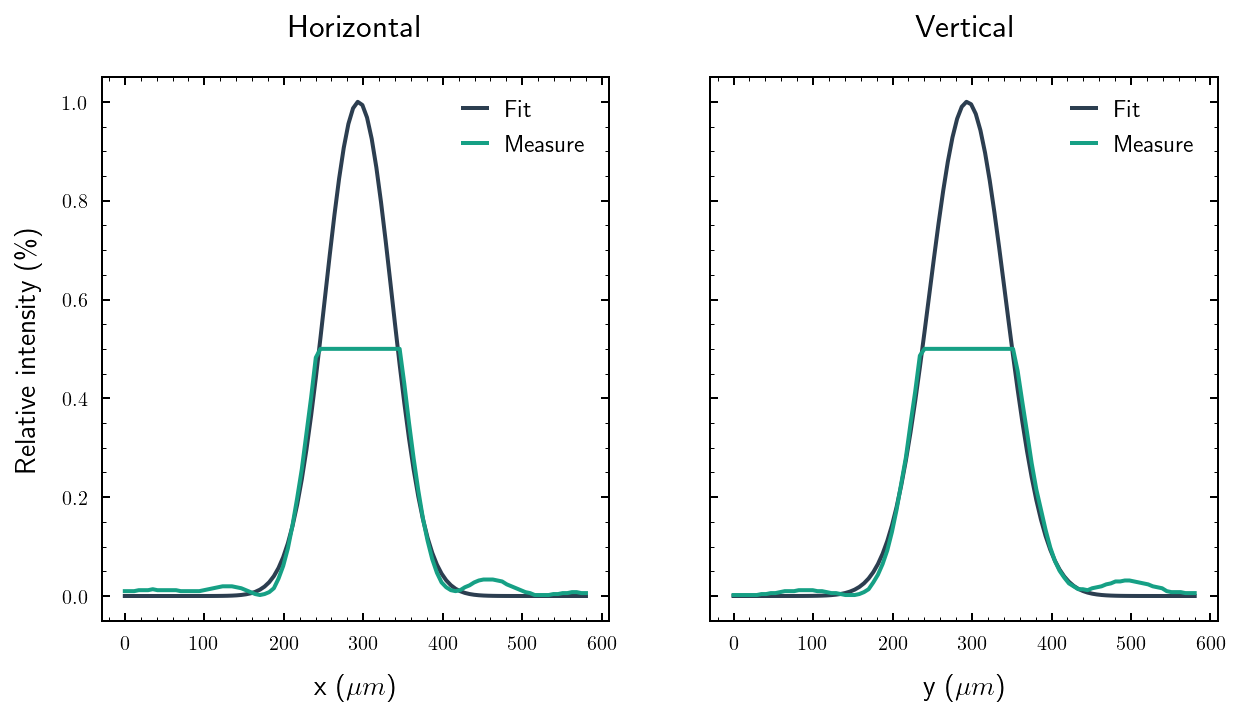

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 5))

x = ps*np.arange(0, w)
y = ps*np.arange(0, h)

a = patch[:, w // 2]
b = patch[h // 2, :]

#u = fit(gaussian, x, a, [1.4, 300, 100])
#v = fit(gaussian, y, b, [1.4, 300, 100])
u = gaussian(x, 2.0, 294, 42)
v = gaussian(y, 2.0, 294, 48)

vmax = np.min([u.max(), v.max()])

axes[0].plot(x, u / vmax, label='Fit', color='#2c3e50')
axes[0].plot(x, a / vmax, label='Measure', color='#16a085')

axes[0].set_title('Horizontal')
axes[0].set_xlabel('x ($\mu m$)')
axes[0].set_ylabel('Relative intensity (\%)')
axes[0].legend()

axes[1].plot(y, v / vmax, label='Fit', color='#2c3e50')
axes[1].plot(y, b / vmax, label='Measure', color='#16a085')
axes[1].set_title('Vertical')
axes[1].set_xlabel('y ($\mu m$)')
axes[1].legend()

fig.savefig(os.path.join(figuredir, 'profile1d.pdf'))

plt.show()